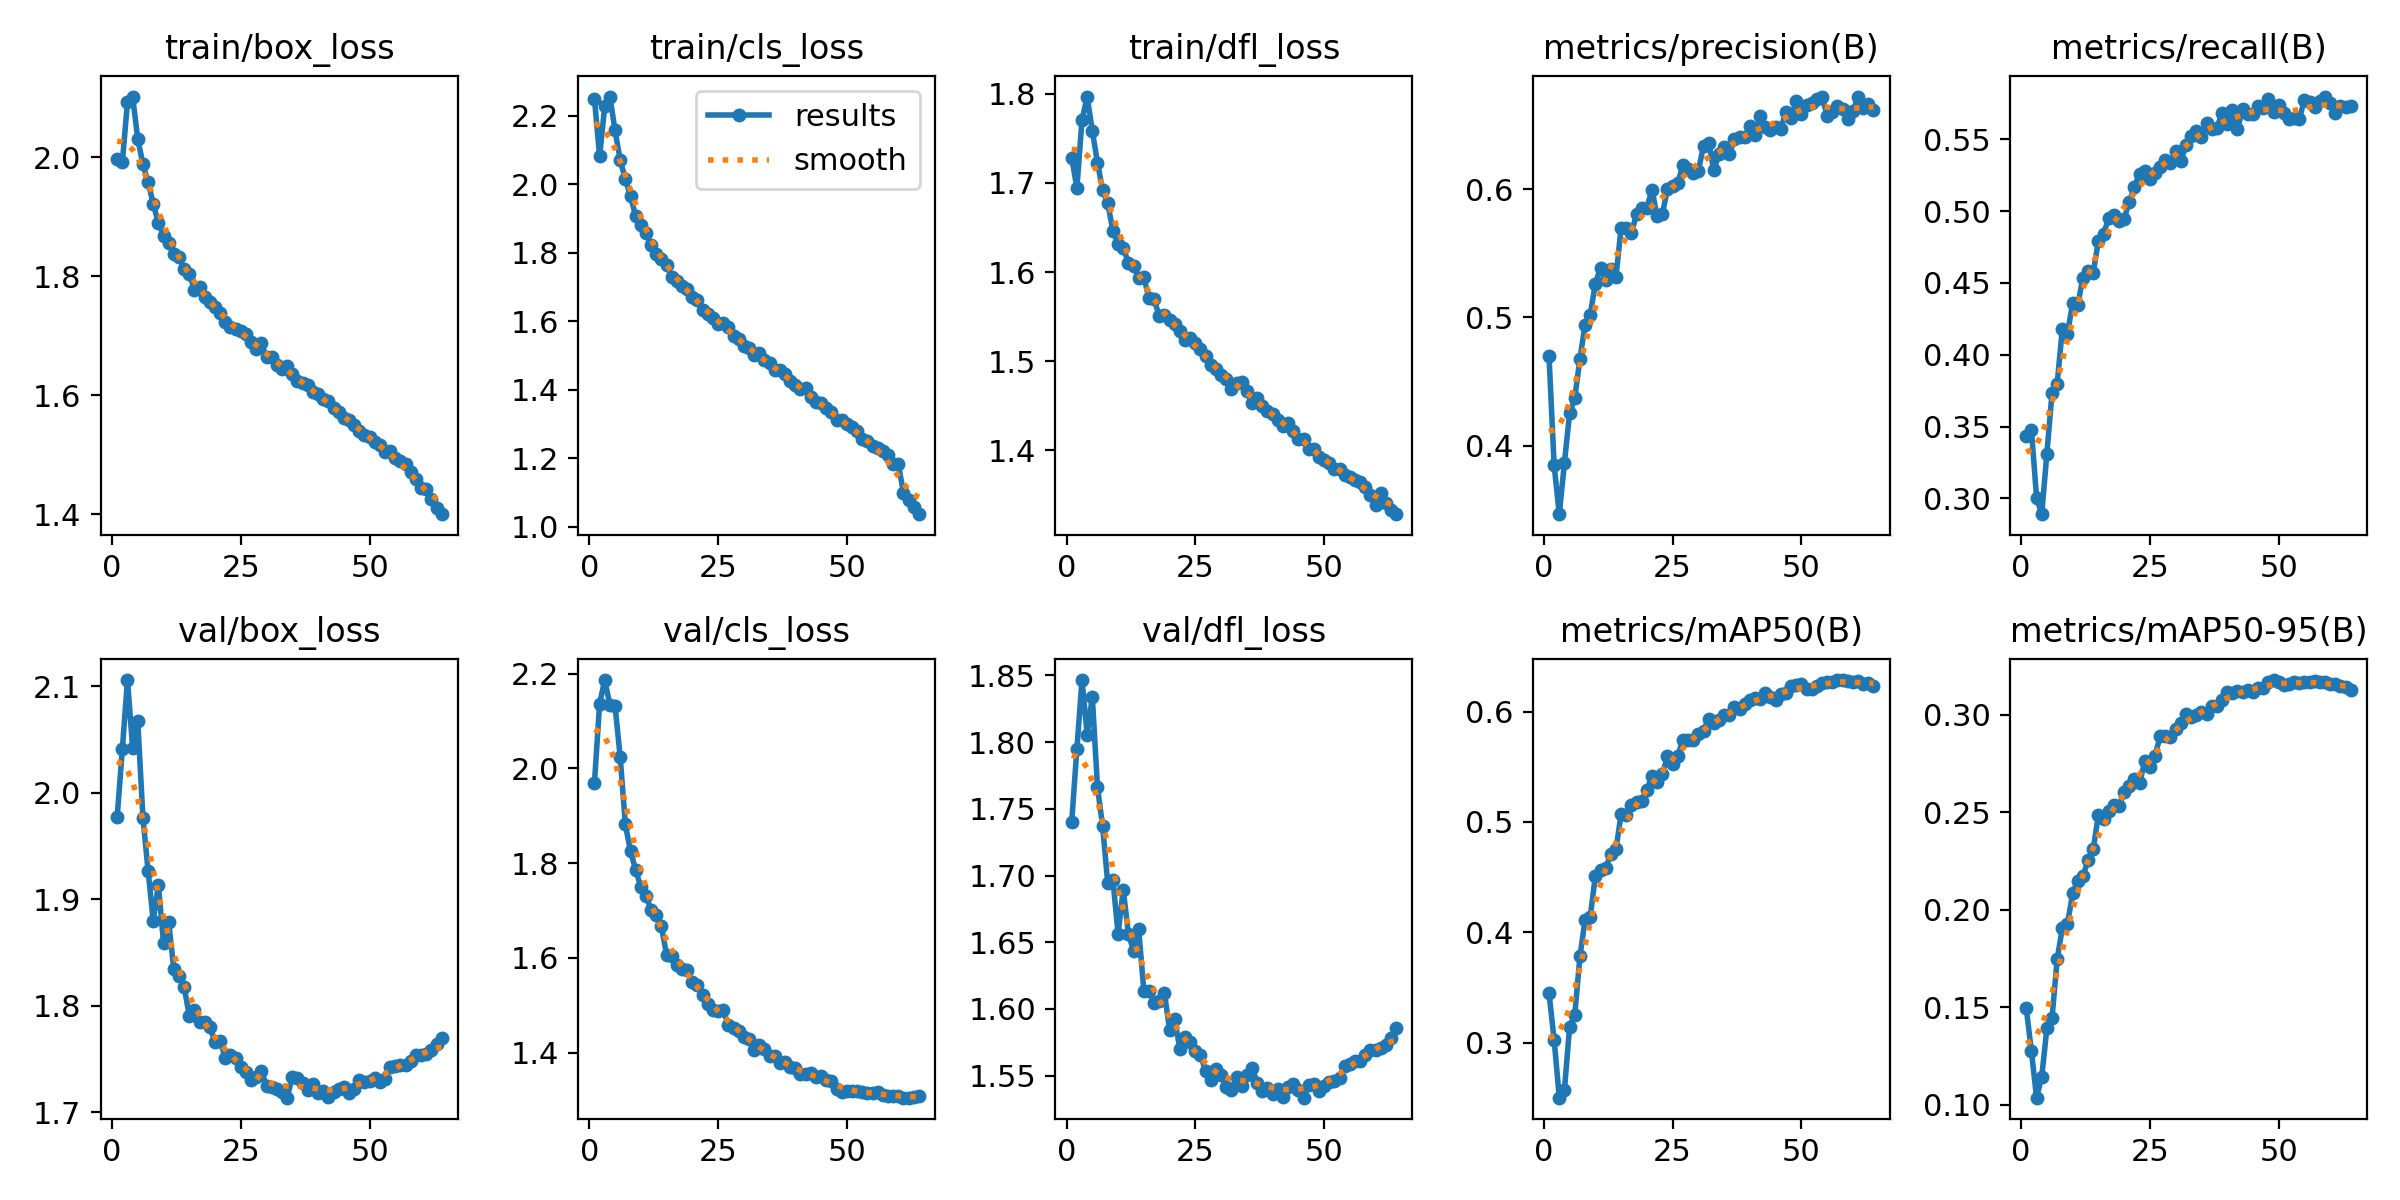

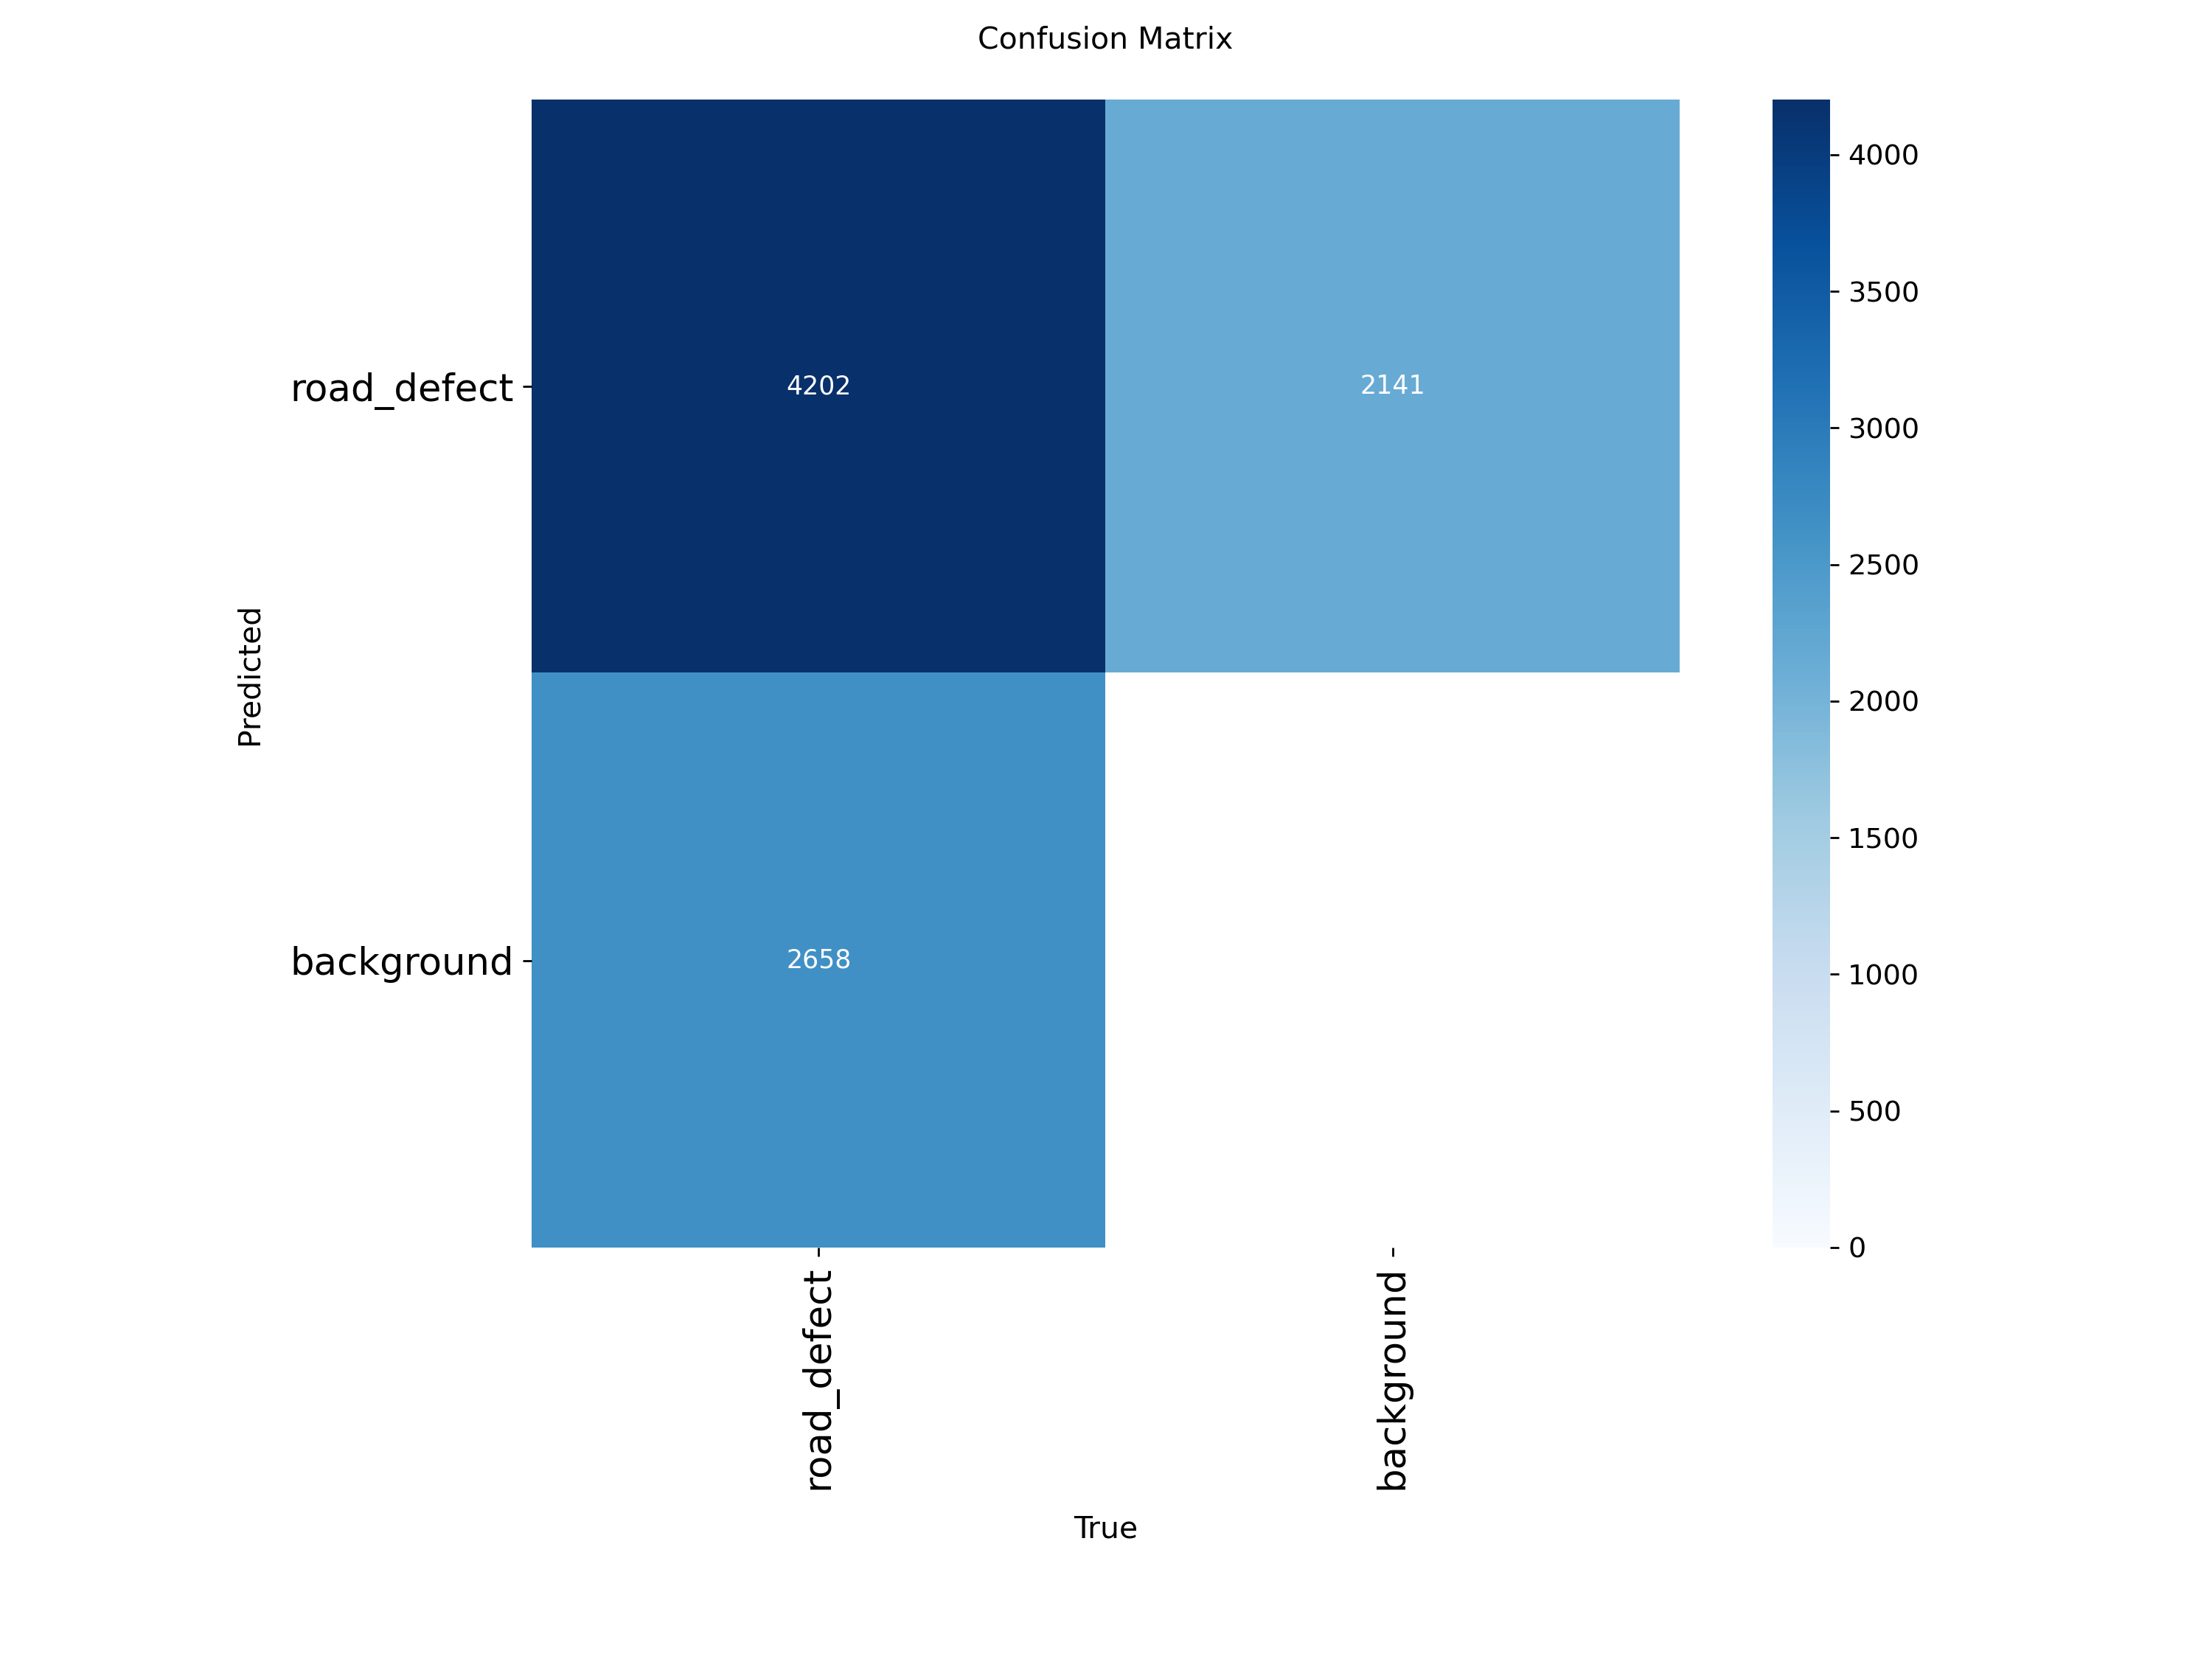

In [1]:
from IPython.display import Image, display
from pathlib import Path

RUN_DIR = Path("../../runs/three_country_training/road_defect_binary/yolov8m")

display(Image(filename=str(RUN_DIR / "results.png")))
display(Image(filename=str(RUN_DIR / "confusion_matrix.png")))


In [2]:
import pandas as pd

results_csv = RUN_DIR / "results.csv"
assert results_csv.exists(), "results.csv not found!"

df = pd.read_csv(results_csv)
df.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
59     60  10241.9         1.44445         1.18318         1.33823   
60     61  10411.3         1.44205         1.09905         1.35250   
61     62  10581.0         1.42572         1.07858         1.34089   
62     63  10750.5         1.41005         1.05689         1.33271   
63     64  10919.8         1.40050         1.03736         1.32850   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
59               0.66125            0.57522           0.62649   
60               0.67169            0.56822           0.62746   
61               0.66377            0.57324           0.62538   
62               0.66646            0.57236           0.62548   
63               0.66187            0.57332           0.62346   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
59              0.31581       1.75422       1.30833       1.56956  0.004967   
60              0.31578       1.75501       1.30509       1.57100  0.004543   
61              0.31481       1.75856       1.30490       1.57328  0.004119   
62              0.31413       1.76414       1.30552       1.57862  0.003694   
63              0.31257       1.76998       1.30855       1.58538  0.003270   

      lr/pg1    lr/pg2    lr/pg3    lr/pg4    lr/pg5    lr/pg6    lr/pg7  
59  0.001656  0.004967  0.001656  0.004967  0.001656  0.004967  0.001656  
60  0.001514  0.004543  0.001514  0.004543  0.001514  0.004543  0.001514  
61  0.001373  0.004119  0.001373  0.004119  0.001373  0.004119  0.001373  
62  0.001231  0.003694  0.001231  0.003694  0.001231  0.003694  0.001231  
63  0.001090  0.003270  0.001090  0.003270  0.001090  0.003270  0.001090

In [3]:
final = df.iloc[-1]

print("Final metrics:")
print(f"Precision: {final['metrics/precision(B)']:.4f}")
print(f"Recall:    {final['metrics/recall(B)']:.4f}")
print(f"mAP@0.5:   {final['metrics/mAP50(B)']:.4f}")
print(f"mAP@0.5:0.95: {final['metrics/mAP50-95(B)']:.4f}")

Final metrics:
Precision: 0.6619
Recall:    0.5733
mAP@0.5:   0.6235
mAP@0.5:0.95: 0.3126


In [4]:
# Predict
from ultralytics import YOLO
model = YOLO("../../runs/three_country_training/road_defect_binary/yolov8m/weights/best.pt")

model.predict(
    source="../../data/test1/India/images",
    conf=0.2,
    save=True,
    project="../../runs/three_country_inference/road_defect_binary/yolov8m",
    name="predictions_test"
)



image 1/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000006.jpg: 416x416 1 road_defect, 6.8ms
image 2/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000009.jpg: 416x416 2 road_defects, 6.7ms
image 3/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000015.jpg: 416x416 (no detections), 7.0ms
image 4/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000021.jpg: 416x416 (no detections), 6.7ms
image 5/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000025.jpg: 416x416 (no detections), 6.7ms
image 6/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000029.jpg: 416x416 (no detections), 7.6ms
image 7/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'road_defect'}
 obb: None
 orig_img: array([[[222, 184, 150],
         [221, 183, 149],
         [221, 183, 149],
         ...,
         [205, 163, 128],
         [205, 163, 128],
         [205, 163, 128]],
 
        [[221, 183, 149],
         [221, 183, 149],
         [220, 182, 148],
         ...,
         [205, 163, 128],
         [205, 163, 128],
         [205, 163, 128]],
 
        [[220, 182, 148],
         [220, 182, 148],
         [219, 181, 147],
         ...,
         [205, 163, 128],
         [205, 163, 128],
         [205, 163, 128]],
 
        ...,
 
        [[ 83,  87,  88],
         [ 81,  85,  86],
         [ 79,  83,  84],
         ...,
         [ 61,  60,  46],
         [ 61,  60,  46],
         [ 60,  59,  45]],
 
        [[ 80,  84,  85],
         [ 81,  85,  86],
         [ 81,  85,  86],
         ...,
         [ 60

Total test images predicted: 969


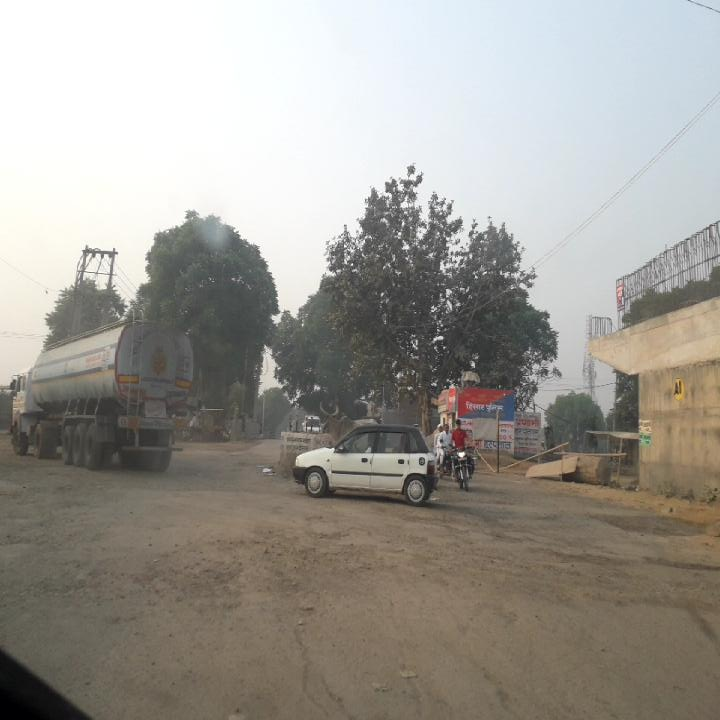

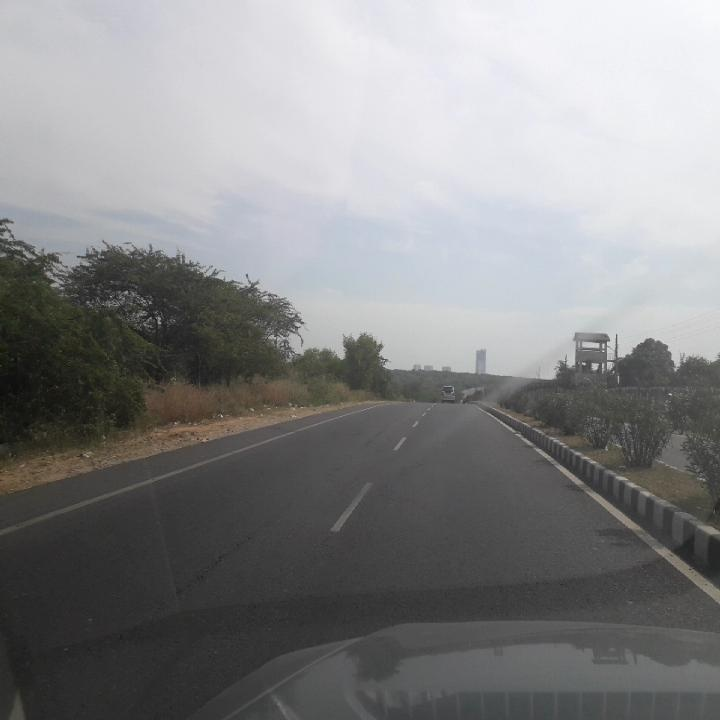

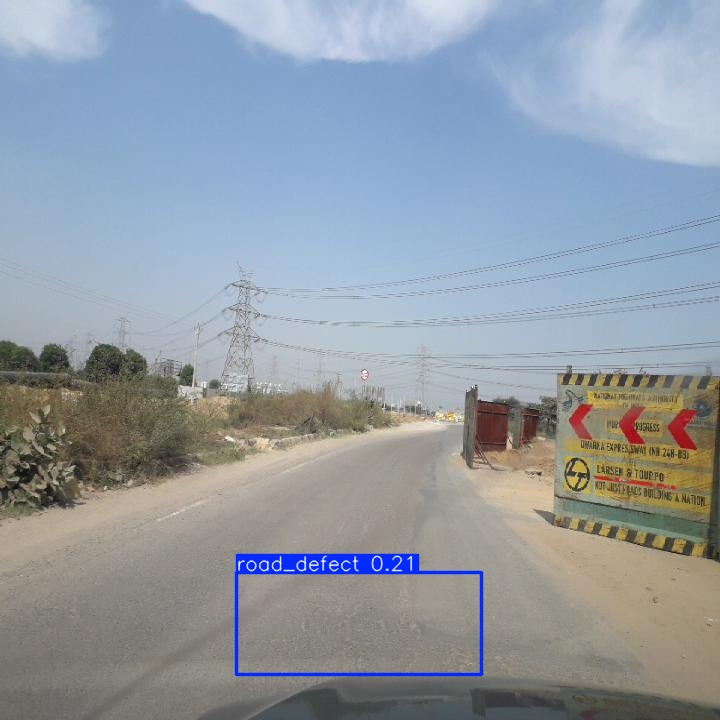

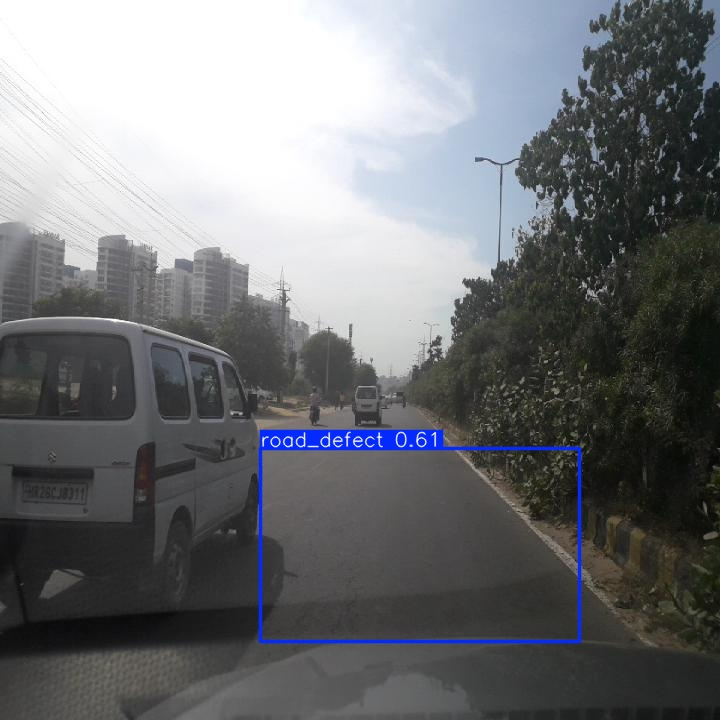

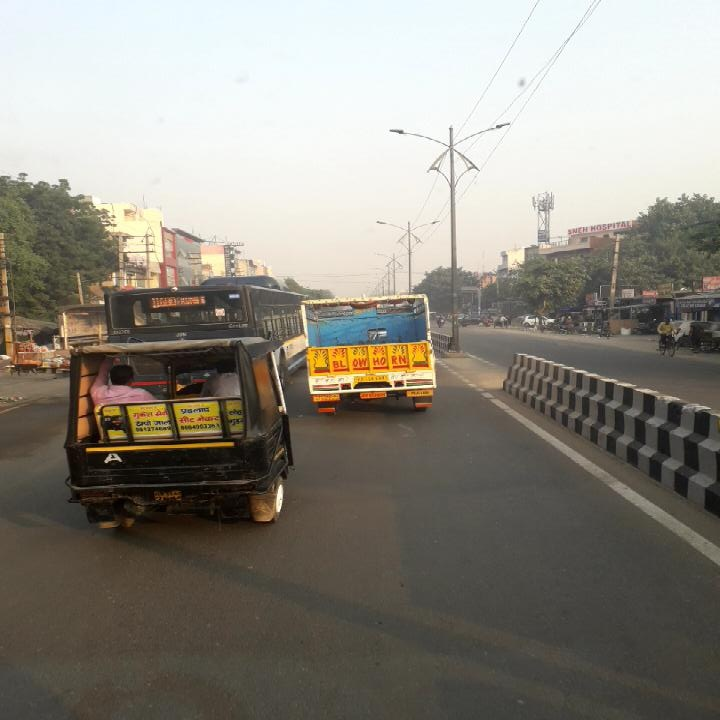

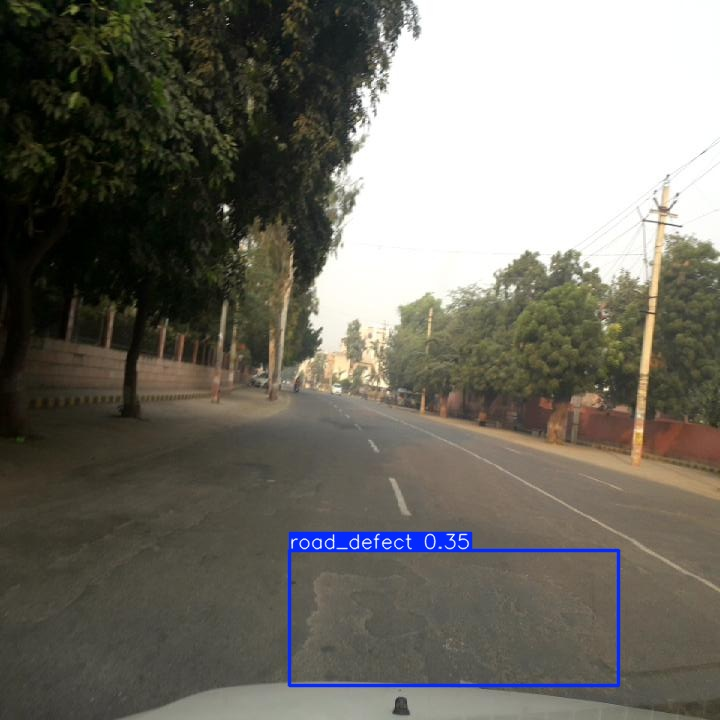

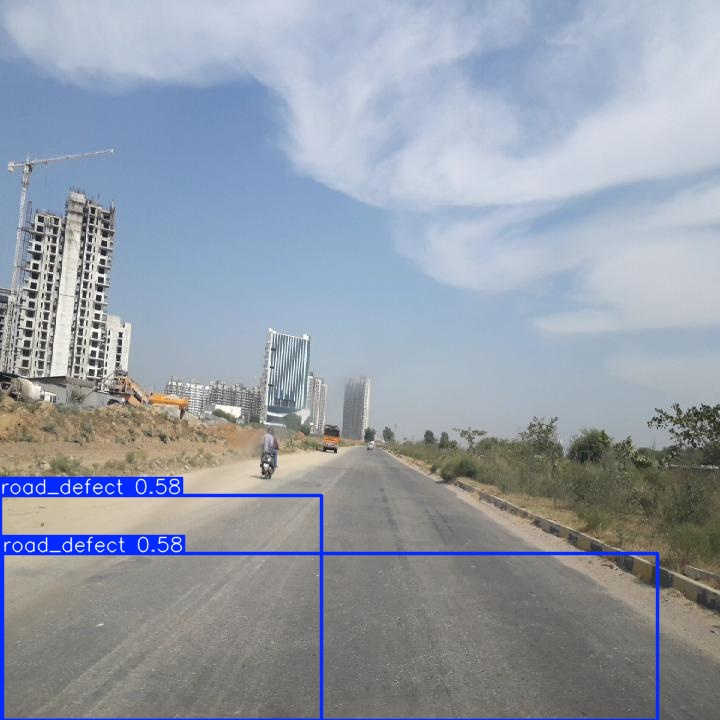

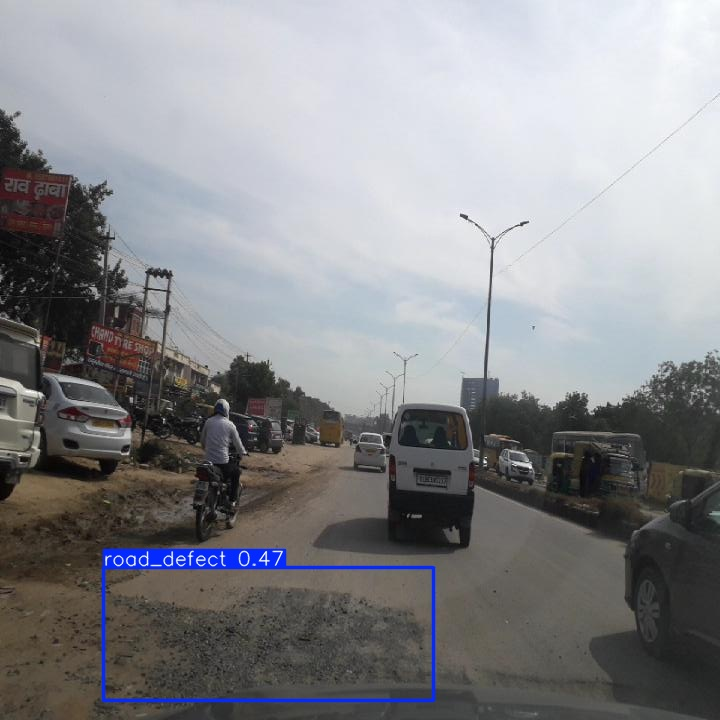

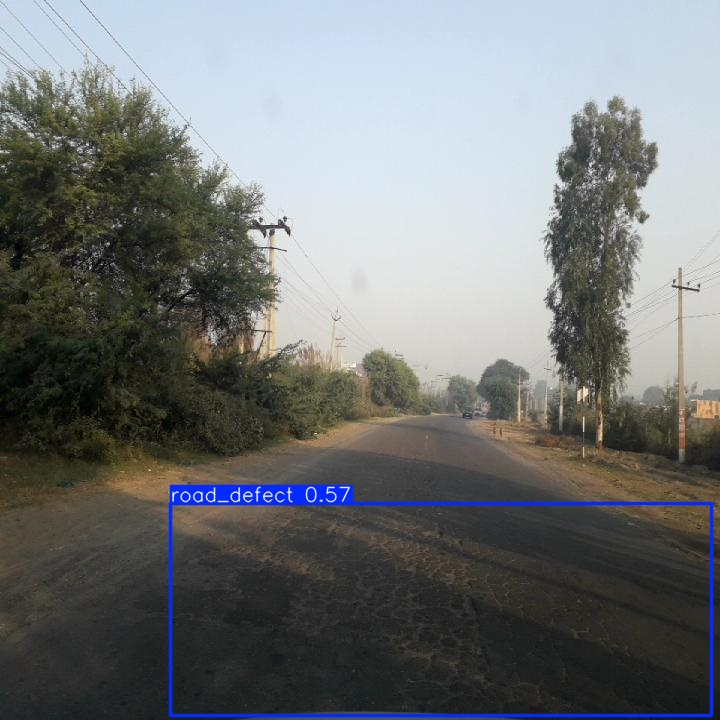

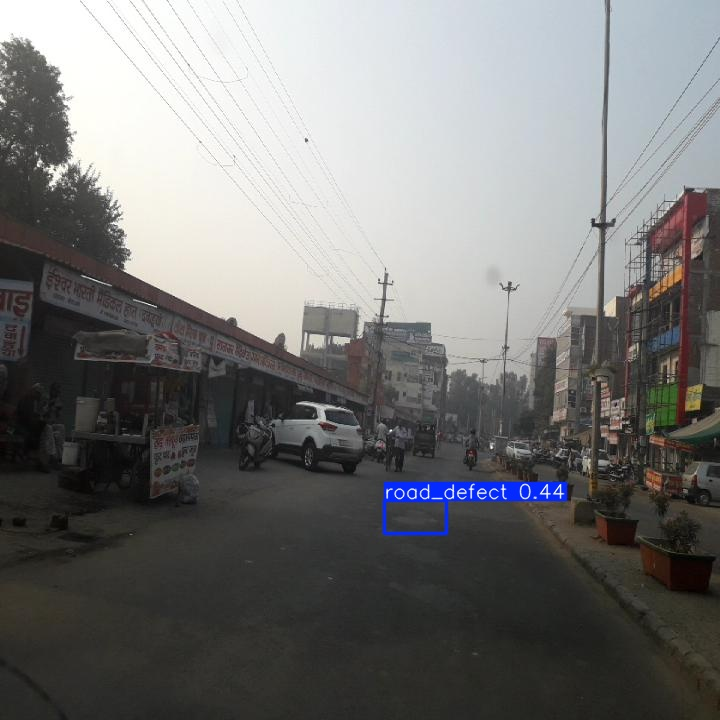

In [5]:
from pathlib import Path
from IPython.display import Image, display
import random

PRED_TEST_DIR = Path("../../runs/three_country_inference/road_defect_binary/yolov8m/predictions_test")

images = list(PRED_TEST_DIR.glob("*.jpg"))
print(f"Total test images predicted: {len(images)}")

for img in random.sample(images, 10):
    display(Image(filename=str(img)))